In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [24, 27, 22, 32],
        'Salary': [50000, 60000, 45000, 80000]}
df = pd.DataFrame(data)

df['Tax'] = df['Salary'] * 0.10
df['Net Salary'] = df['Salary'] - df['Tax']
print(df)

      Name  Age  Salary     Tax  Net Salary
0    Alice   24   50000  5000.0     45000.0
1      Bob   27   60000  6000.0     54000.0
2  Charlie   22   45000  4500.0     40500.0
3    David   32   80000  8000.0     72000.0


In [4]:
data = {'Sex': ['male', 'female', 'female', 'male', 'female'],
        'Class': ['First', 'Second', 'Third', 'First', 'Second'],
        'Fare': [100, 50, 20, 120, 60]}
df = pd.DataFrame(data)

mean_fare = df.groupby(['Sex', 'Class'])['Fare'].mean()
print(mean_fare)

Sex     Class 
female  Second     55.0
        Third      20.0
male    First     110.0
Name: Fare, dtype: float64


In [5]:
passenger_count = df['Class'].value_counts()
print(passenger_count)

Class
First     2
Second    2
Third     1
Name: count, dtype: int64


In [6]:
data = {'Student': ['Alice', 'Bob', 'Charlie'],
        'Math': [85, 90, 95],
        'Science': [88, 92, 96]}
df = pd.DataFrame(data)

df_long = df.melt(id_vars=['Student'], var_name='Subject', value_name='Score')
print(df_long)

   Student  Subject  Score
0    Alice     Math     85
1      Bob     Math     90
2  Charlie     Math     95
3    Alice  Science     88
4      Bob  Science     92
5  Charlie  Science     96


In [7]:
df_wide = df_long.pivot(index='Student', columns='Subject', values='Score')
print(df_wide)

Subject  Math  Science
Student               
Alice      85       88
Bob        90       92
Charlie    95       96


In [8]:
data1 = {'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']}
data2 = {'ID': [2, 3, 4], 'Score': [85, 90, 95]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

inner_join = pd.merge(df1, df2, on='ID', how='inner')
left_join = pd.merge(df1, df2, on='ID', how='left')
print(inner_join)
print(left_join)

   ID     Name  Score
0   2      Bob     85
1   3  Charlie     90
   ID     Name  Score
0   1    Alice    NaN
1   2      Bob   85.0
2   3  Charlie   90.0


In [9]:
data = {'Department': ['HR', 'IT', 'Finance', 'HR', 'Finance', 'IT'],
        'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
        'Salary': [50000, 60000, 55000, 52000, 59000, 61000]}
df = pd.DataFrame(data)

total_salary = df.groupby('Department')['Salary'].sum()
average_salary = df.groupby('Department')['Salary'].mean()
print(total_salary)
print(average_salary)

Department
Finance    114000
HR         102000
IT         121000
Name: Salary, dtype: int64
Department
Finance    57000.0
HR         51000.0
IT         60500.0
Name: Salary, dtype: float64


In [19]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [24, np.nan, 22, 32],
        'Salary': [50000, 60000, np.nan, 80000]}
df = pd.DataFrame(data)

mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
df.dropna(subset=['Salary'], inplace=True)
print(df)

    Name   Age   Salary
0  Alice  24.0  50000.0
1    Bob  26.0  60000.0
3  David  32.0  80000.0


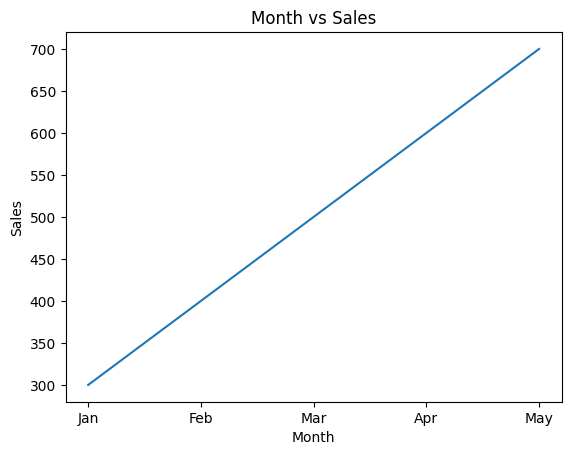

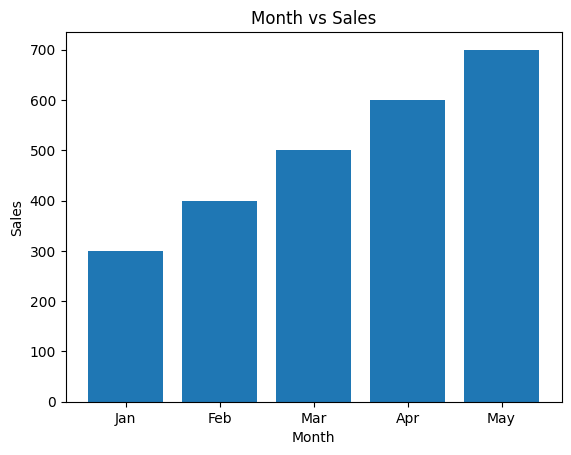

In [11]:
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
        'Sales': [300, 400, 500, 600, 700]}
df = pd.DataFrame(data)

plt.plot(df['Month'], df['Sales'])
plt.title('Month vs Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.bar(df['Month'], df['Sales'])
plt.title('Month vs Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [12]:
dates = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']
sales = np.random.randint(100, 500, size=5)
df = pd.DataFrame({'Date': dates, 'Sales': sales})

df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Sales'] > 300]
print(filtered_df)

        Date  Sales
0 2023-01-01    318
1 2023-01-02    460
2 2023-01-03    388
3 2023-01-04    369


In [13]:
cities = pd.Series(['Washington, D.C.', 'London', 'Paris', 'Berlin'],
                   index=['USA', 'UK', 'France', 'Germany'])
print(cities)

USA        Washington, D.C.
UK                   London
France                Paris
Germany              Berlin
dtype: object


In [14]:
data = {'Population': [331, 67, 65, 83],
        'Capital': ['Washington, D.C.', 'London', 'Paris', 'Berlin']}
df = pd.DataFrame(data, index=['USA', 'UK', 'France', 'Germany'])
print(df)


         Population           Capital
USA             331  Washington, D.C.
UK               67            London
France           65             Paris
Germany          83            Berlin


In [15]:
df = pd.read_csv('titanic.csv')
print(df.shape[1])  # Number of columns
print(len(df.columns))  # Number of variables

12
12


In [16]:
data = {'Population (millions)': [8.5, 3.9, 2.2],
        'Size (km2)': [783.8, 604.3, 105.4],
        'Population Density (people per km2)': [10845, 6454, 20874]}
df = pd.DataFrame(data, index=['New York', 'Los Angeles', 'Chicago'])
print(df)

             Population (millions)  Size (km2)  \
New York                       8.5       783.8   
Los Angeles                    3.9       604.3   
Chicago                        2.2       105.4   

             Population Density (people per km2)  
New York                                   10845  
Los Angeles                                 6454  
Chicago                                    20874  


In [18]:
city_matrix = np.array([[8.5, 783.8, 10845], [3.9, 604.3, 6454], [2.2, 105.4, 20874]])
city_df = pd.DataFrame(city_matrix, index=['New York', 'Los Angeles', 'Chicago'], columns=['Population (millions)', 'Size (km2)', 'Population Density (people per km2)'])

# a) population density for all cities
print(city_df['Population Density (people per km2)'])

# b) data for the third city
print(city_matrix[2])  # Using index
print(city_df.iloc[2])  # Using row number

New York       10845.0
Los Angeles     6454.0
Chicago        20874.0
Name: Population Density (people per km2), dtype: float64
[2.2000e+00 1.0540e+02 2.0874e+04]
Population (millions)                      2.2
Size (km2)                               105.4
Population Density (people per km2)    20874.0
Name: Chicago, dtype: float64
